# Project BINF-F402
## Group 2

Daan Vandenberge, EMAIL, STUDENTENNUMMER

Karolien Heymans, karolien.heymans@ulb.be, 000577754

Fien Strijthaegen, fien.strijthaegen@ulb.be, 000532187

This file contains TODO...

## Clinical data

In [ ]:
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)

In [ ]:
Age = clinical_data$AGE
BMI = clinical_data$BMI
Cohort = clinical_data$COHORT
Hardy_scale = clinical_data$DTHHRDY
Heigth = clinical_data$HGHT
Ischemic_Time = clinical_data$TRISCHD
Sex = clinical_data$SEX
Weigth = clinical_data$WGHT


all variables have been assigned to a vector

In [ ]:
any(is.na(Age))
any(is.na(BMI))
any(is.na(Cohort))
any(is.na(Hardy_scale))
any(is.na(Heigth))
any(is.na(Ischemic_Time))
any(is.na(Sex))
any(is.na(Weigth))


[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

every variable has no empty value

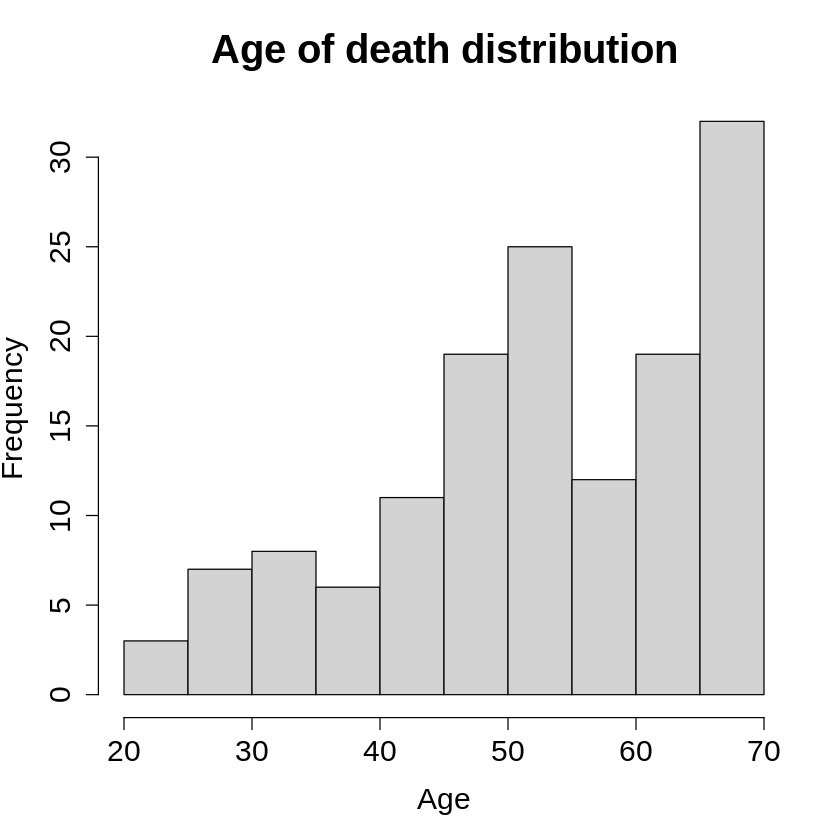

In [ ]:
hist(Age, main = "Age of death distribution", xlab = "Age", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)



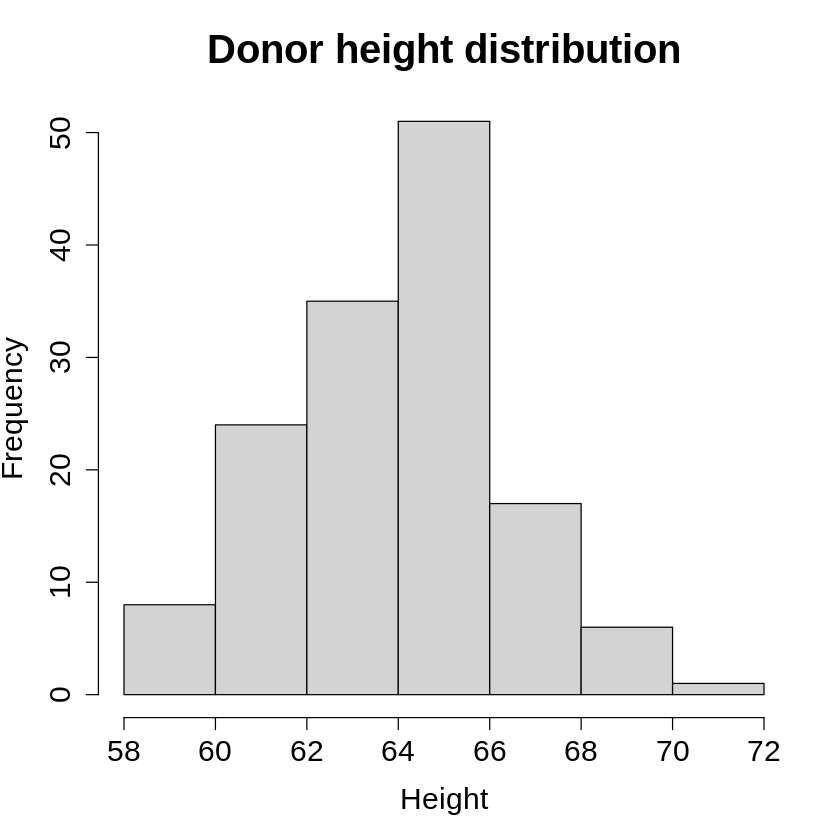

In [ ]:
hist(Heigth, main = "Donor height distribution", xlab = "Height", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

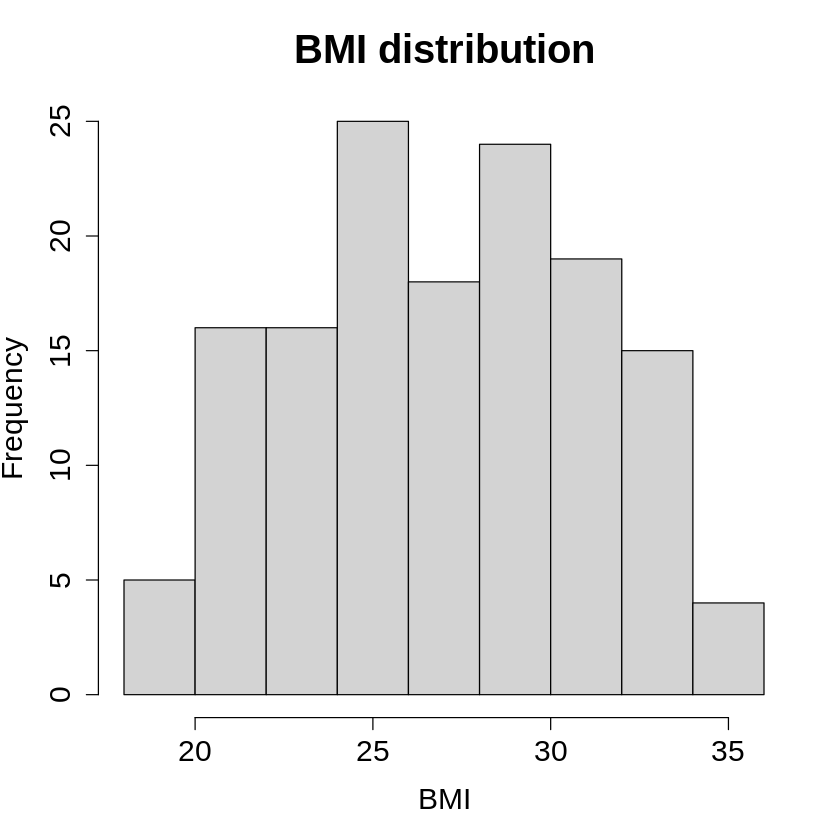

In [ ]:
hist(BMI, main = "BMI distribution", xlab = "BMI", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

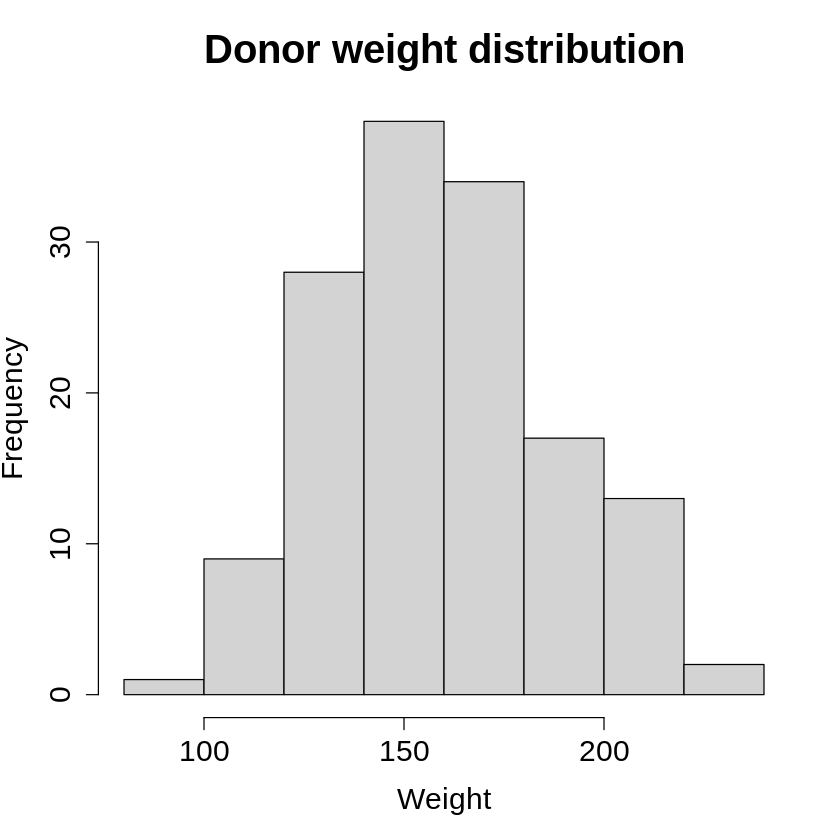

In [ ]:
hist(Weigth, main = "Donor weight distribution", xlab = "Weight", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

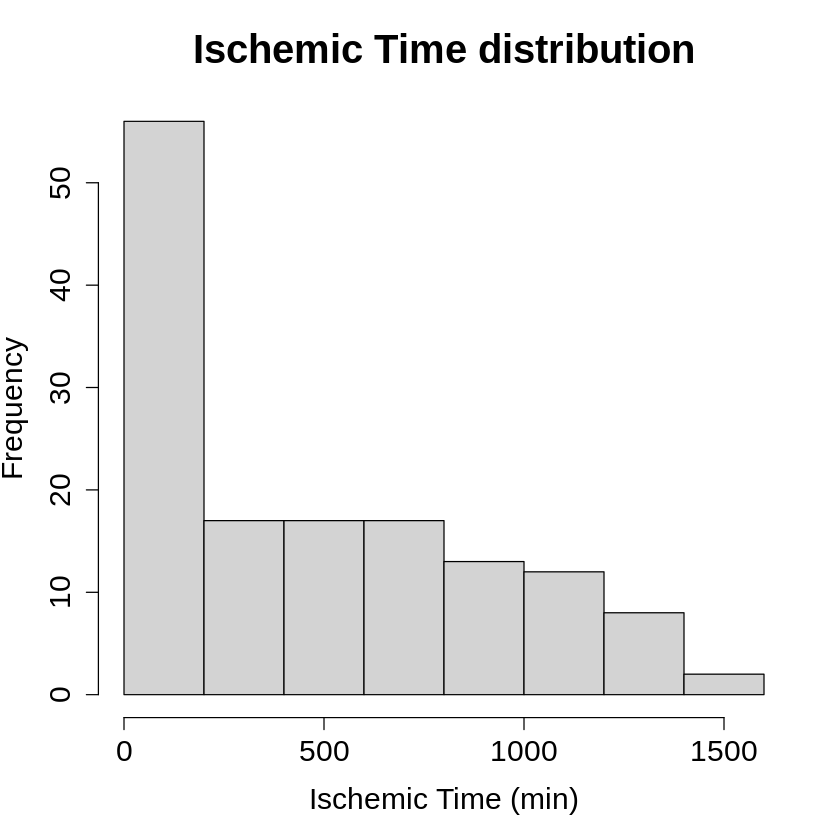

In [ ]:
hist(Ischemic_Time,  main = "Ischemic Time distribution", xlab = "Ischemic Time (min)", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

In [ ]:

# Create a histogram with custom bin ranges
hist(Hardy_scale, bins=[0, 1, 2, 3, 4, 5])

# Set the x-axis label
xlabel('Hardiness Scale')

# Set the y-axis label
ylabel('Frequency')

# Show the plot
show()


ERROR: ignored

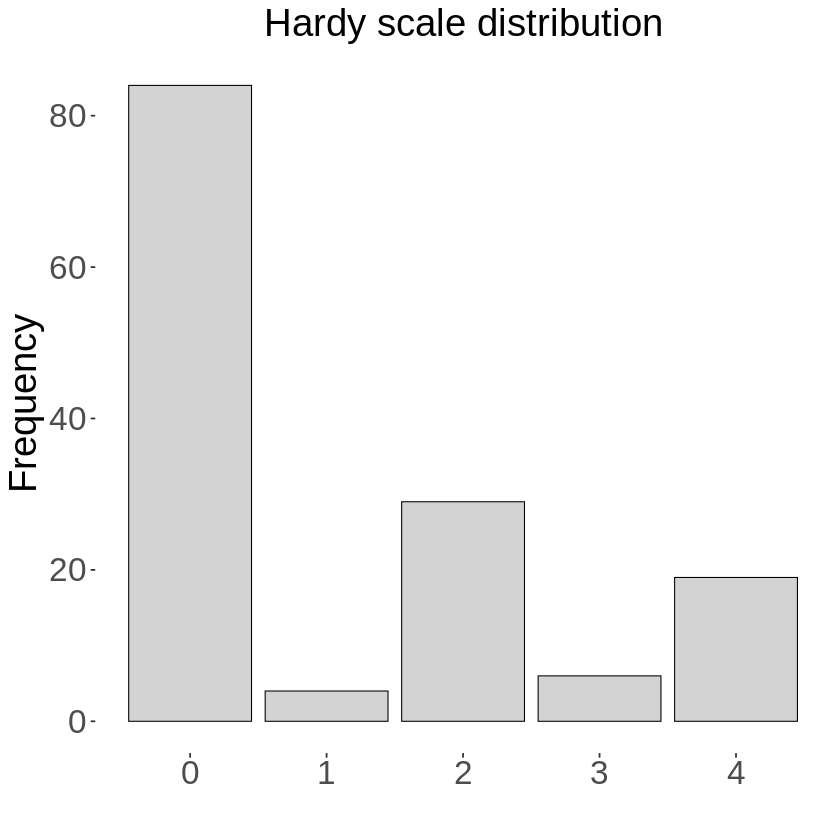

In [ ]:
library(ggplot2)
       
ggplot(data = clinical_data, aes(x = DTHHRDY)) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))

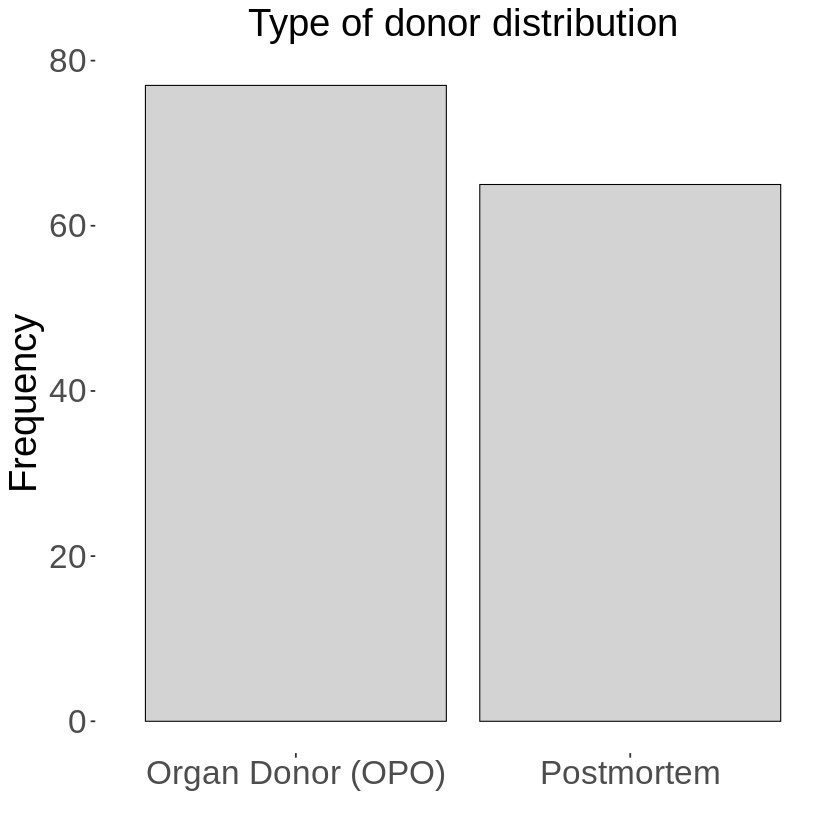

In [ ]:
ggplot(data = clinical_data, aes(x = COHORT)) +
  geom_bar(fill = "lightgrey",color = "black", size = 0.3) +
  labs(title = "Type of donor distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))
        


In [ ]:
shapiro.test(Age)


	Shapiro-Wilk normality test

data:  Age
W = 0.93931, p-value = 8.064e-06


In [ ]:
shapiro.test(BMI)


	Shapiro-Wilk normality test

data:  BMI
W = 0.97479, p-value = 0.009984


In [ ]:
shapiro.test(Hardy_scale)


	Shapiro-Wilk normality test

data:  Hardy_scale
W = 0.71614, p-value = 3.095e-15


In [ ]:
shapiro.test(Heigth)


	Shapiro-Wilk normality test

data:  Heigth
W = 0.98064, p-value = 0.04182


In [ ]:
shapiro.test(Ischemic_Time)



	Shapiro-Wilk normality test

data:  Ischemic_Time
W = 0.88707, p-value = 5.442e-09


In [ ]:
OPO = subset(clinical_data, COHORT == "Organ Donor (OPO)")
POST = subset(clinical_data, COHORT == "Postmortem")

all x values are identical

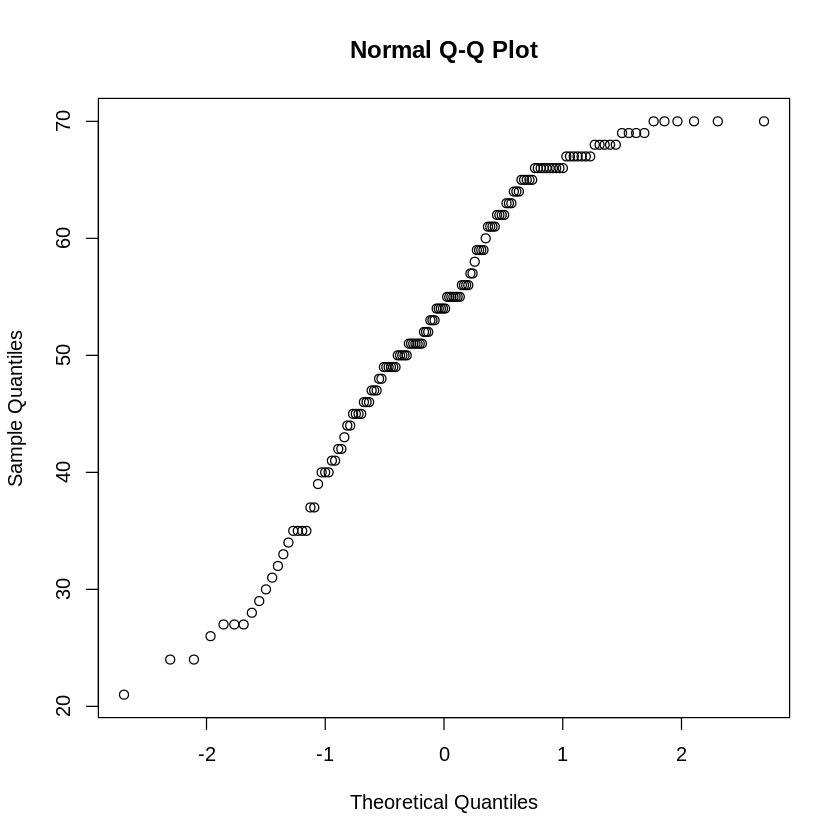

In [ ]:
qqnorm(Age)

## 1.2 Correlation of the clinical variables

The correlation can only be analyzed between the numerical clinical variables.

In [ ]:
numerical_data <- clinical_data[, c("AGE", "HGHT", "WGHT", "BMI", "TRISCHD")]

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



In [ ]:
correlation_matrix = cor(numerical_data, method = "spearman")
print(correlation_matrix)

                 AGE        HGHT        WGHT          BMI     TRISCHD
AGE      1.000000000 -0.03946346 -0.01047059  0.001525525  0.18672364
HGHT    -0.039463456  1.00000000  0.48052359  0.124056430  0.13886352
WGHT    -0.010470591  0.48052359  1.00000000  0.916885941  0.04901136
BMI      0.001525525  0.12405643  0.91688594  1.000000000 -0.03367039
TRISCHD  0.186723639  0.13886352  0.04901136 -0.033670390  1.00000000


The pairs() function is used to create a matrix of scatter plots for the numerical data.

now, we are going to perform the pearson correlatin test , to test the significance of the correlations

In [ ]:
cor.test(BMI, Weigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Weigth
t = 25.739, df = 140, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8748014 0.9335925
sample estimates:
      cor 
0.9085966 


In [ ]:
cor.test(Ischemic_Time, Age, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Age
t = 2.2965, df = 140, p-value = 0.02313
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02664188 0.34444936
sample estimates:
     cor 
0.190533 


In [ ]:
cor.test(Weigth, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Weigth and Heigth
t = 7.1444, df = 140, p-value = 4.536e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3849394 0.6281347
sample estimates:
      cor 
0.5168906 


In [ ]:
cor.test(Ischemic_Time, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Heigth
t = 1.9277, df = 140, p-value = 0.05592
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.004036589  0.317124953
sample estimates:
      cor 
0.1607976 


In [ ]:
cor.test(BMI, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Heigth
t = 1.414, df = 140, p-value = 0.1596
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0469886  0.2779515
sample estimates:
      cor 
0.1186571 


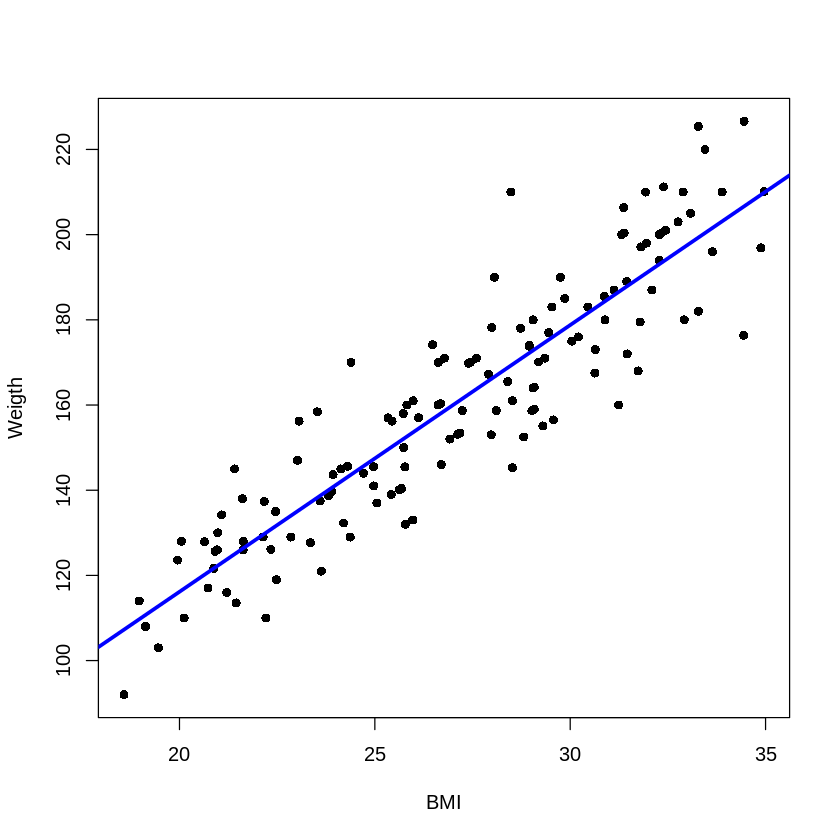

In [ ]:
plot(BMI, Weigth, pch = 16)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)

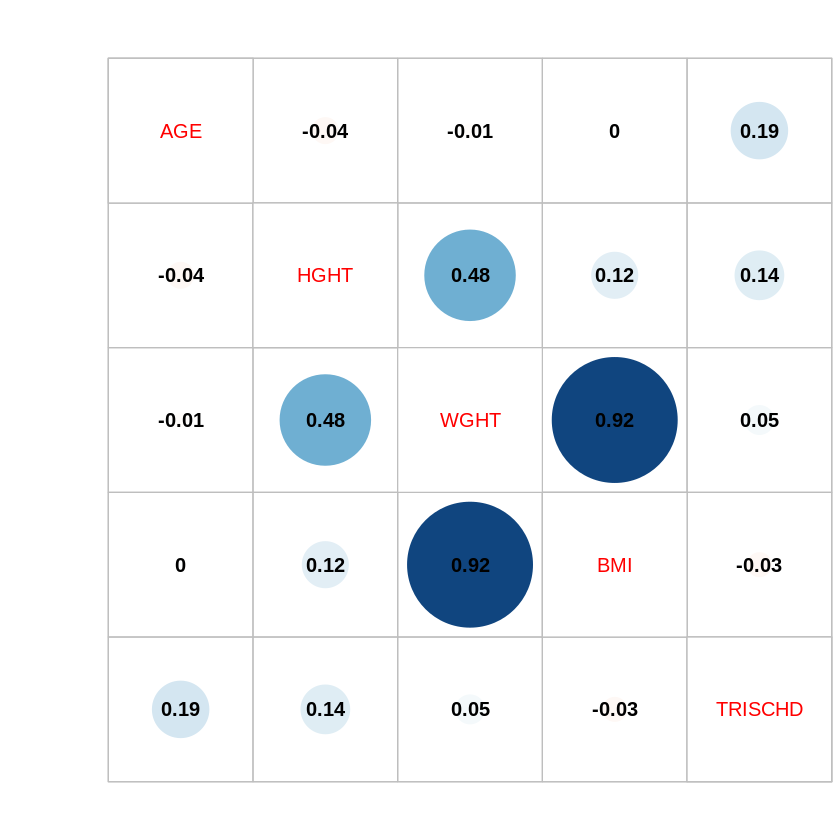

In [ ]:
#correlogram
corrplot(correlation_matrix, addCoef.col = 'black', tl.pos = 'd',
         cl.pos = 'n', col = COL2())

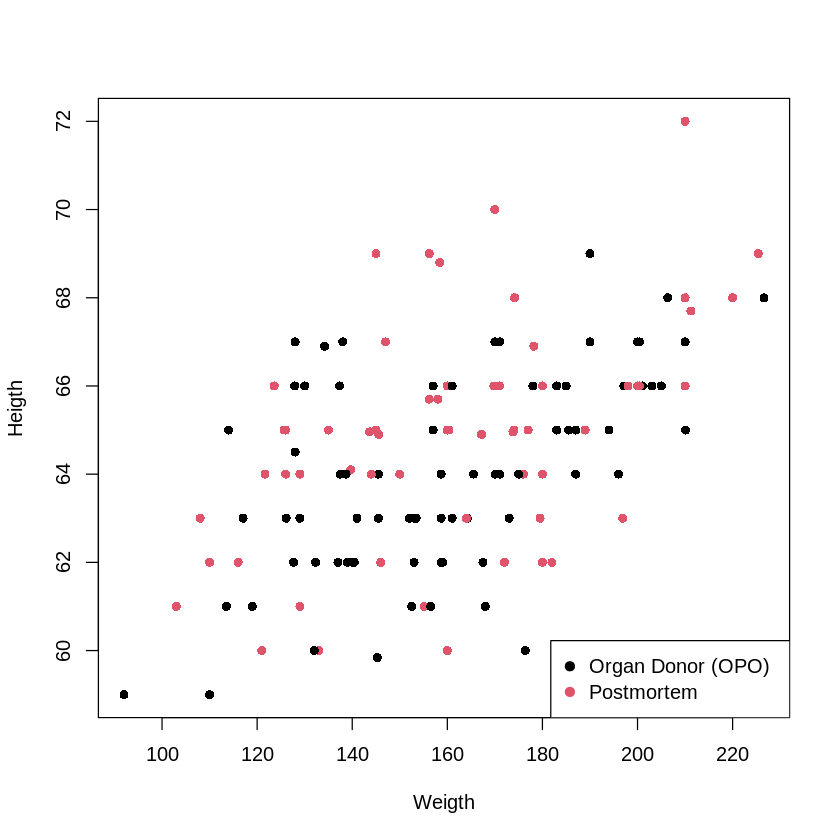

In [ ]:
plot(Weigth, Heigth, pch = 16, col=factor(Cohort))
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))

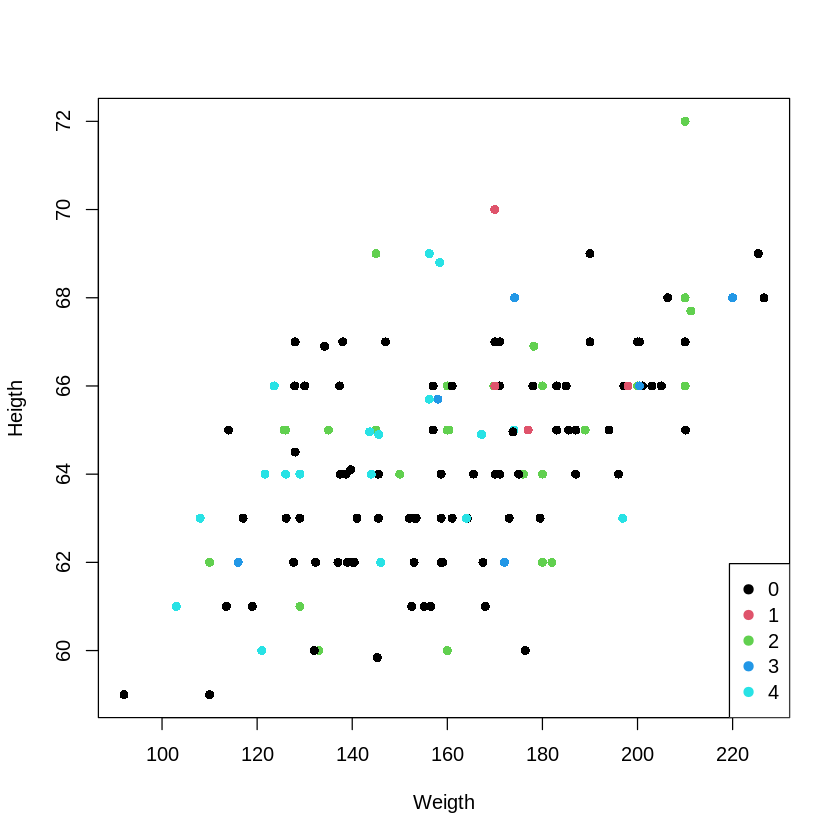

In [ ]:
plot(Weigth, Heigth, pch = 16, col=factor(Hardy_scale))
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))

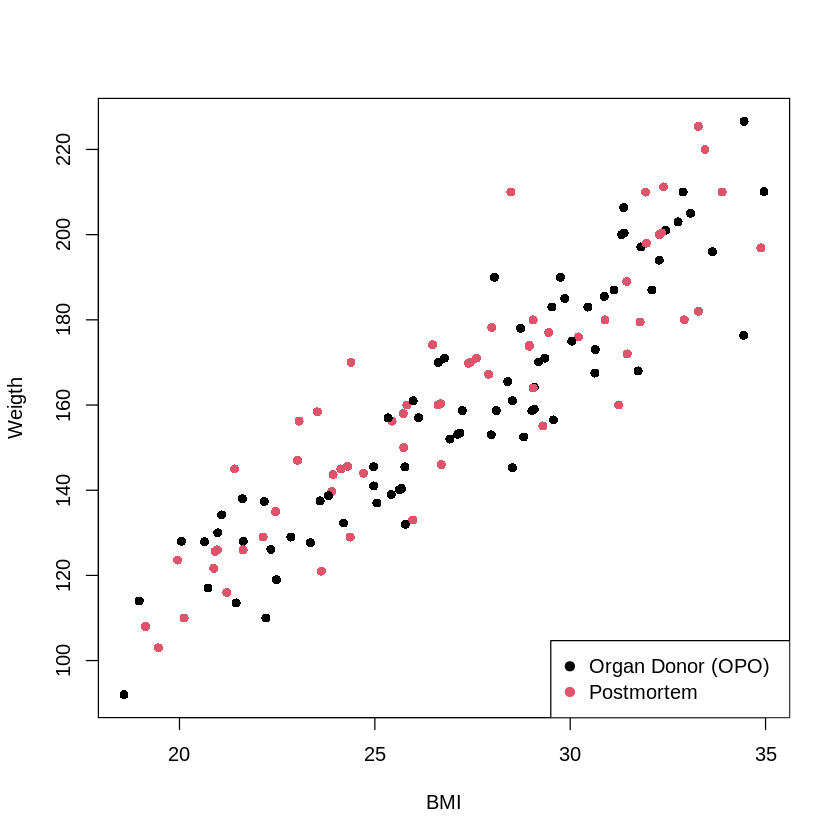

In [ ]:
plot(BMI, Weigth, pch = 16, col=factor(Cohort))
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))

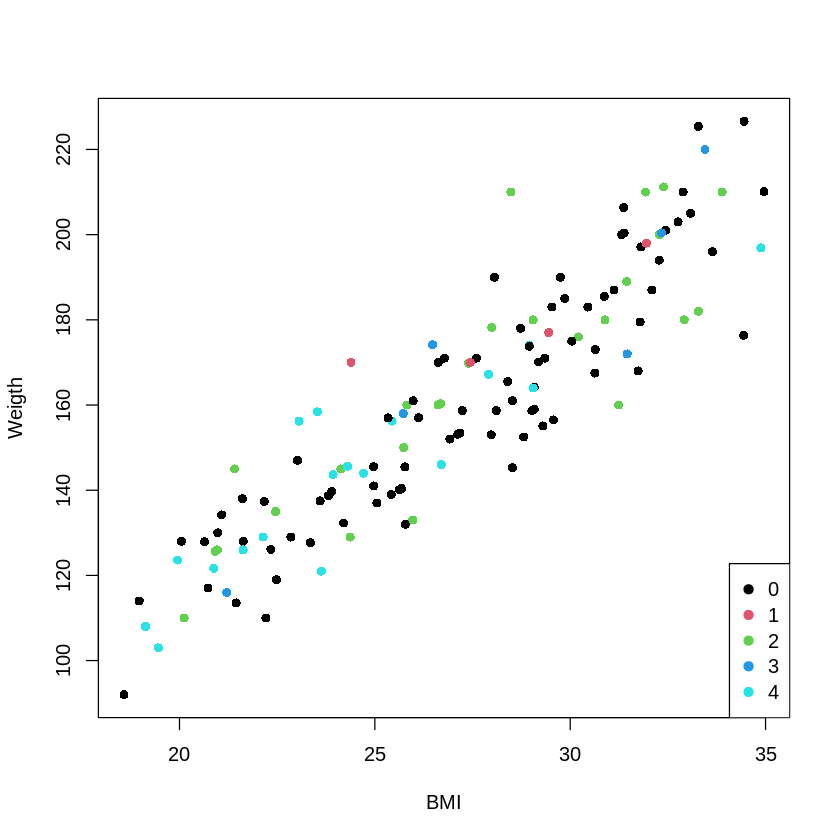

In [ ]:
plot(BMI, Weigth, pch = 16, col=factor(Hardy_scale))
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))

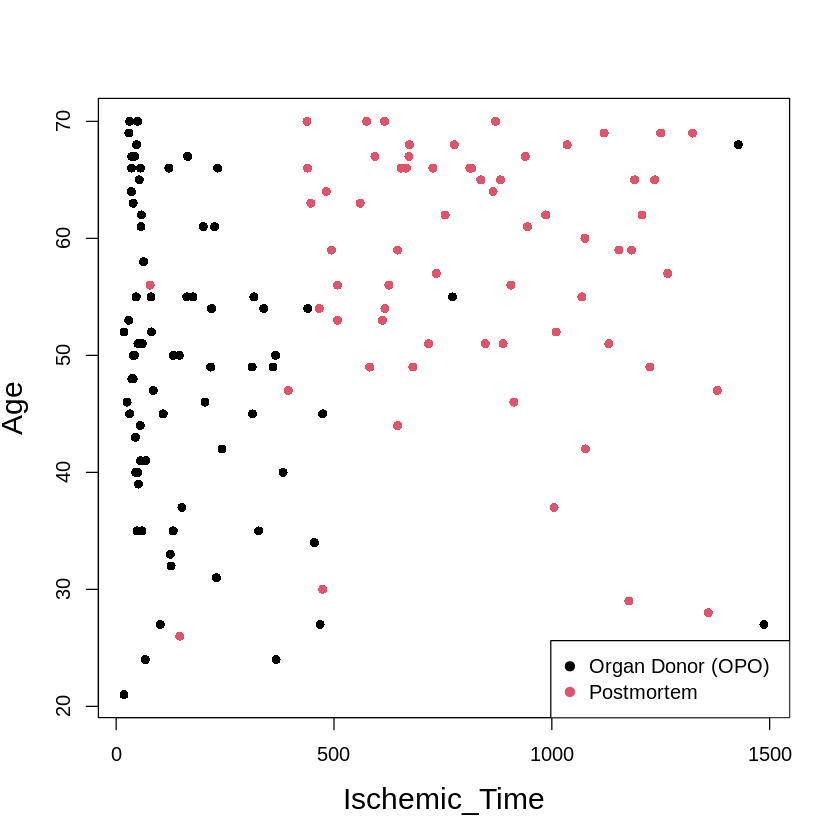

In [ ]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Cohort),cex.lab = 1.5)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

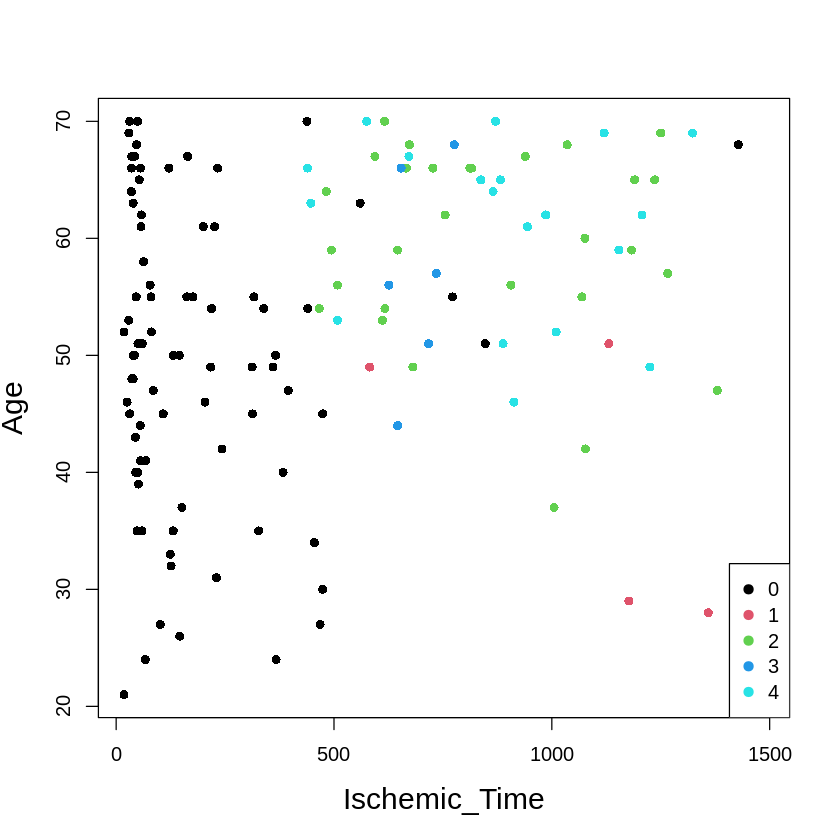

In [ ]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))

In [ ]:
compare_table = table(as.factor(Cohort),as.factor(Hardy_scale))
print(compare_table)


                   
                     0  1  2  3  4
  Organ Donor (OPO) 77  0  0  0  0
  Postmortem         7  4 29  6 19


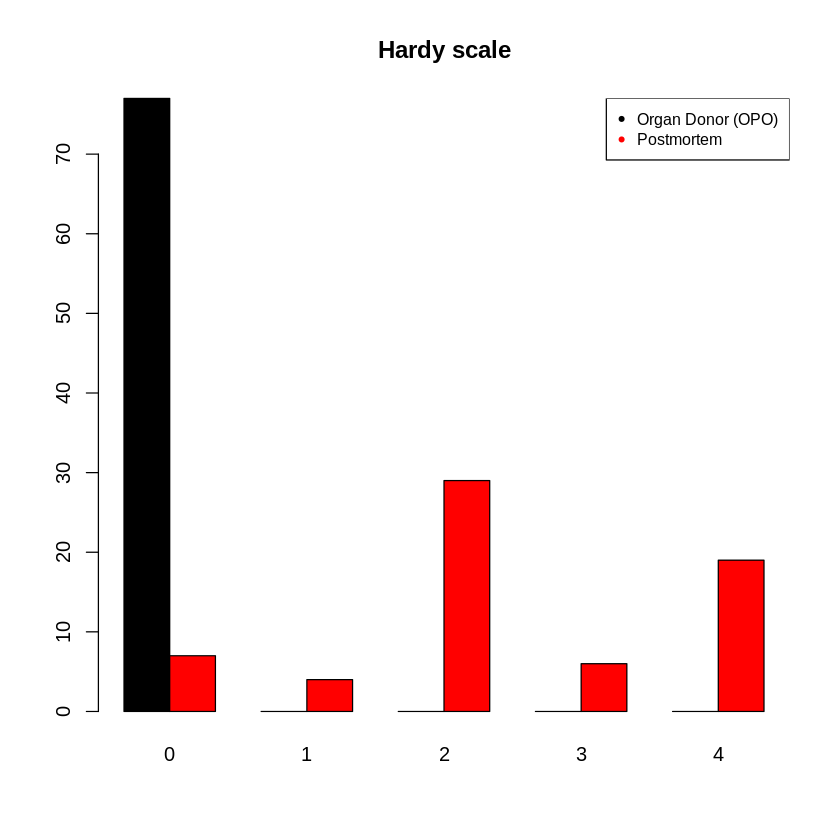

In [ ]:

barplot(compare_table,main="Hardy scale",
        col=c("black","red"),beside=TRUE)
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

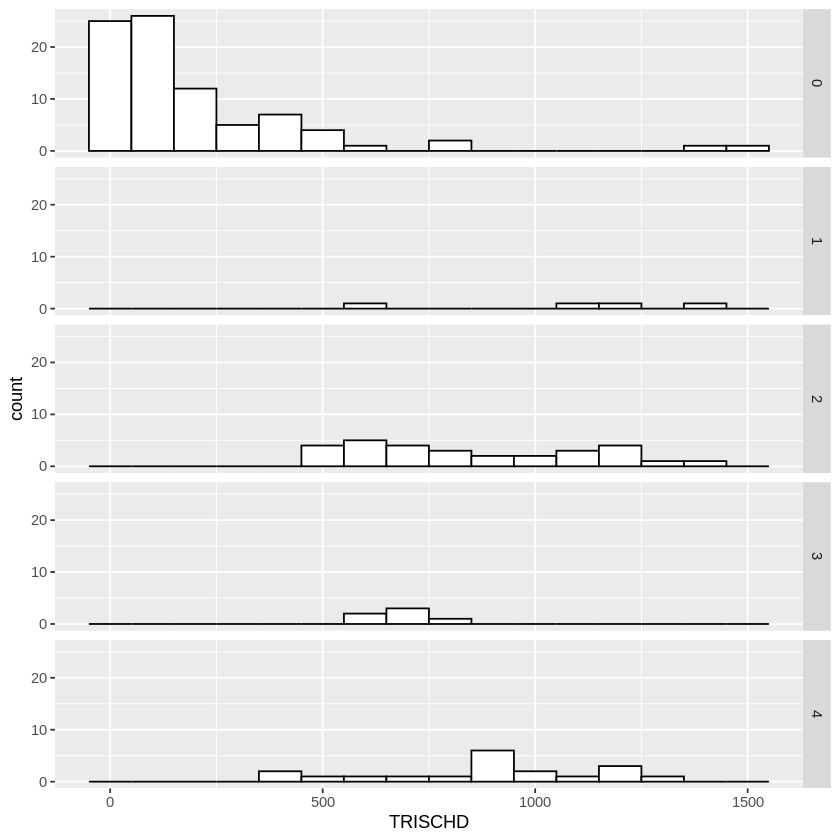

In [ ]:
library(ggplot2)
ggplot(clinical_data, aes(x=TRISCHD)) +
  geom_histogram(fill="white", colour="black", binwidth=100) +
  facet_grid(DTHHRDY ~ .)

PCA analysis

First a subset of the data was created, that only contains the numerical elements

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.4502 1.1063 0.9805 0.8421 0.04849
Proportion of Variance 0.4206 0.2448 0.1923 0.1418 0.00047
Cumulative Proportion  0.4206 0.6654 0.8577 0.9995 1.00000

Warning message in plot.window(...):
“"text" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"text" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"text" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"text" is not a graphical parameter”
Warning message in box(...):
“"text" is not a graphical parameter”
Warning message in title(...):
“"text" is not a graphical parameter”
Warning message in text.default(x, xlabs, cex = cex[1L], col = col[1L], ...):
“"text" is not a graphical parameter”
Warning message in plot.window(...):
“"text" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"text" is not a graphical parameter”
Warning message in title(...):
“"text" is not a graphical parameter”
Warning message in axis(3, col = col[2L], ...):
“"text" is not a graphical parameter”
Warning message in axis(4, col = col[2L], ...):
“"text" is not a gr

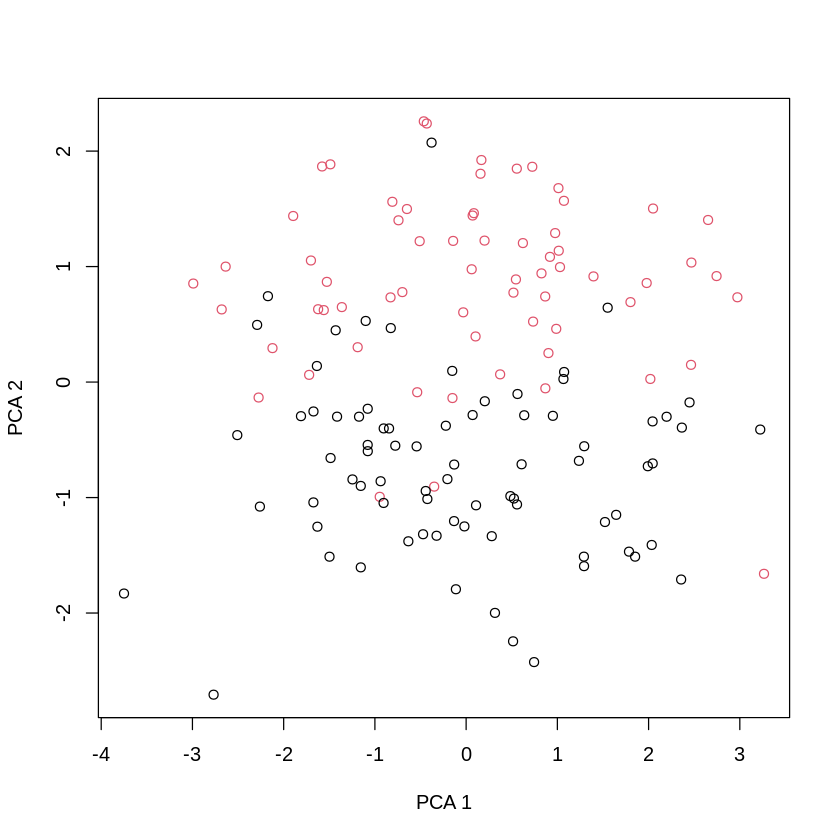

[1] 2.103098742 1.223966912 0.961392693 0.709190800 0.002350852
[1] 42.06197484 24.47933824 19.22785387 14.18381601  0.04701705


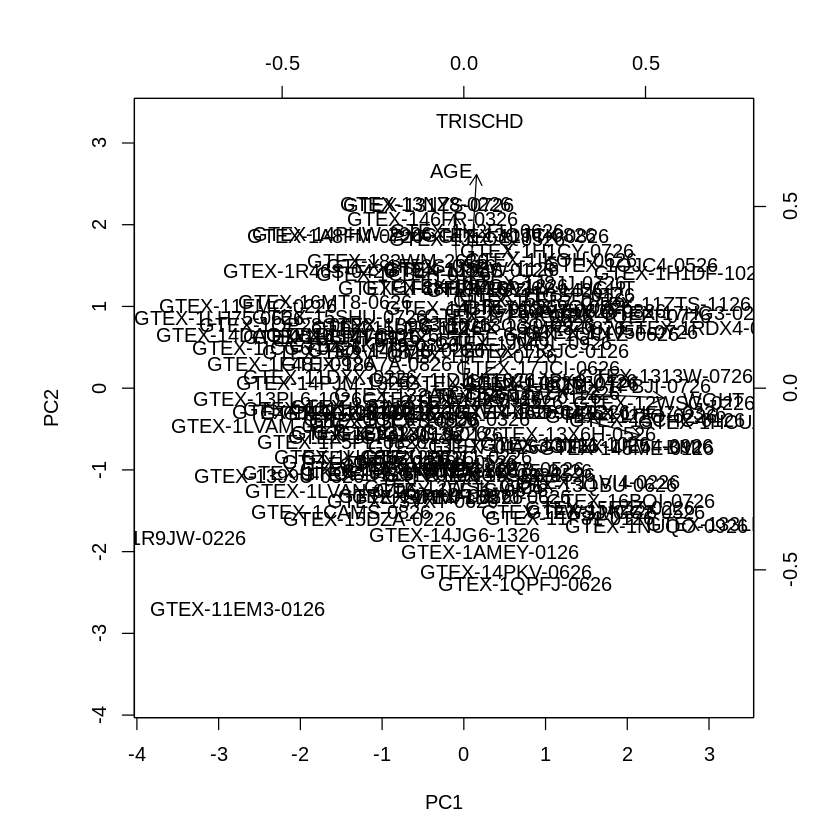

In [ ]:
num_data = clinical_data[,c(2, 3, 4, 5, 8)]
PCA_data = scale(num_data)

PCA_analysis = prcomp(PCA_data, center = TRUE, scale. = TRUE)
summary(PCA_analysis)
plot(PCA_analysis$x[,1], PCA_analysis$x[,2], xlab = "PCA 1", ylab = "PCA 2", col = factor(Cohort)) 
  #plot of the PCA
#biplot(PCA_analysis, scale = 0, col = c("black"), text= FALSE)

# Add the dots representing the observations to the biplot
#invisible(text(PCA_analysis$x[,1], PCA_analysis$x[,2], labels = ".", cex = 2))

# Add a legend for the arrows representing the variables



print(PCA_analysis$sdev^2)# print out the eigenvalues
print(PCA_analysis$sdev^2/sum(PCA_analysis$sdev^2)*100)#percentage of variance explained by the pca




Warning message in plot.window(...):
“"text" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"text" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"text" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"text" is not a graphical parameter”
Warning message in box(...):
“"text" is not a graphical parameter”
Warning message in title(...):
“"text" is not a graphical parameter”
Warning message in text.default(x, xlabs, cex = cex[1L], col = col[1L], ...):
“"text" is not a graphical parameter”
Warning message in plot.window(...):
“"text" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"text" is not a graphical parameter”
Warning message in title(...):
“"text" is not a graphical parameter”
Warning message in axis(3, col = col[2L], ...):
“"text" is not a graphical parameter”
Warning message in axis(4, col = col[2L], ...):
“"text" is not a gr

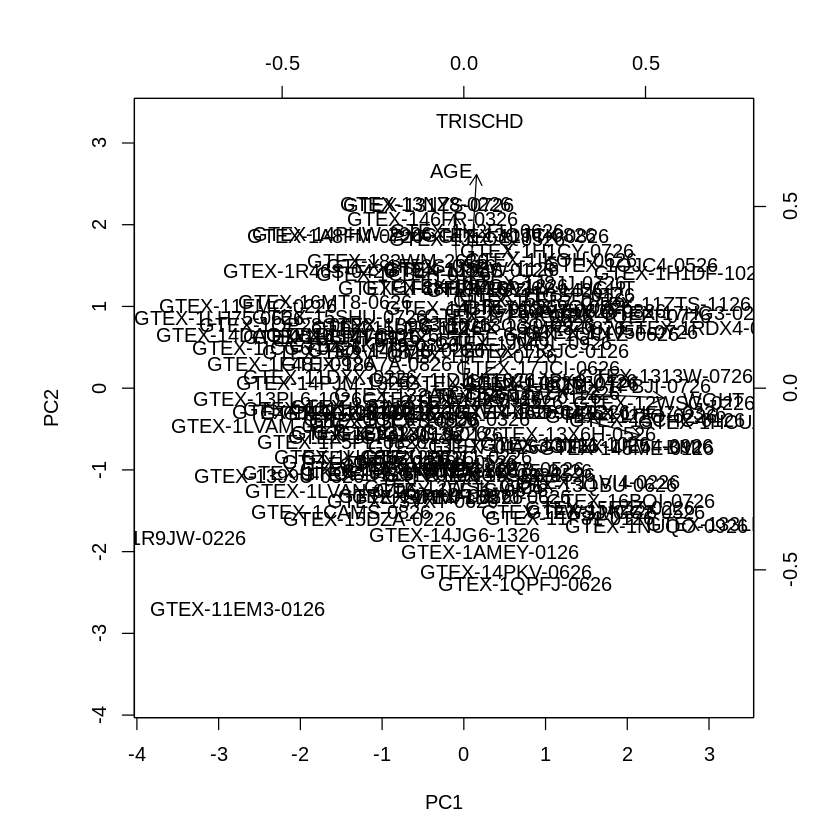

In [ ]:
biplot(PCA_analysis, scale = 0, col = c("black"), text = FALSE)

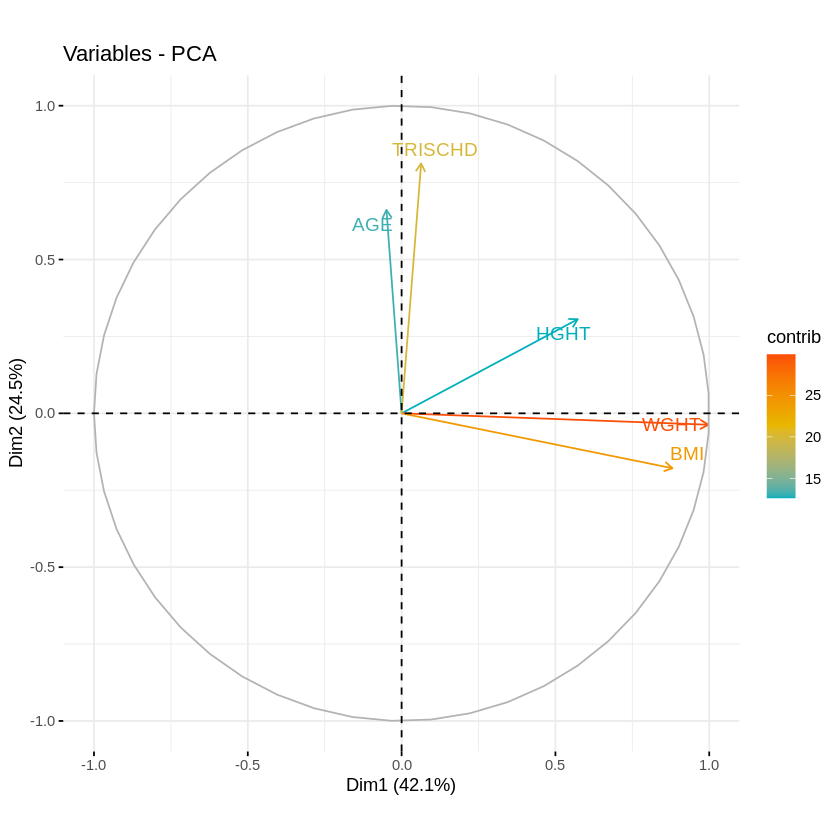

In [ ]:
#install.packages("factoextra")
library(factoextra)
fviz_pca_var(PCA_analysis,col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)

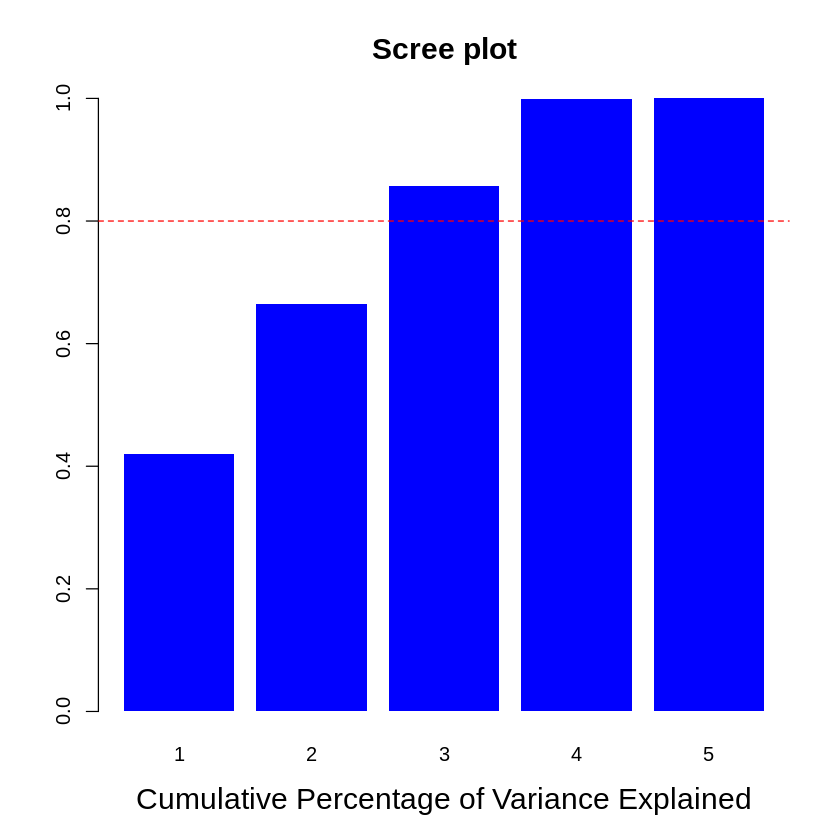

In [ ]:
variances = PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
cum_variances = cumsum(variances)
barplot(cum_variances, main = "Scree plot", xlab = "Cumulative Percentage of Variance Explained", col = "blue", border = NA, names.arg = 1:length(cum_variances),cex.lab=1.5, cex.main=1.5)
abline(h = 0.8, lty = 2, col = "red")

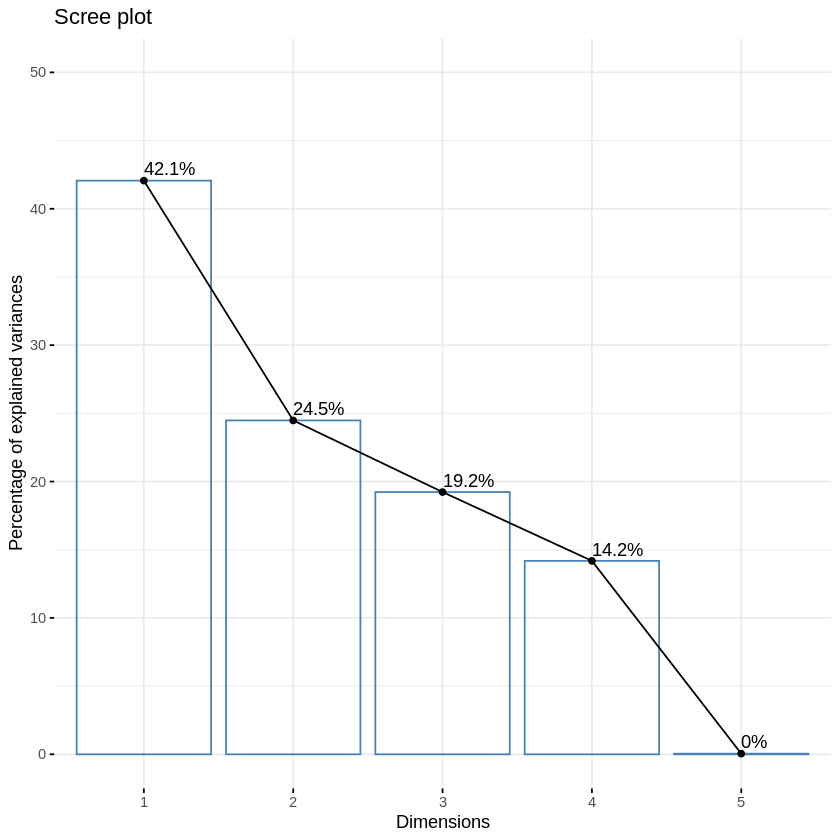

In [ ]:
#prop_var = 100 * PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
#screeplot(PCA_analysis, type = "l", main = "Scree Plot", ylim = c(0, 60), 
          #ylab = "Percentage of variance explained", axes = FALSE)
#axis(2, at = seq(0, 60, by = 10), labels = seq(0, 60, by = 10))
#lines(prop_var, type = "b", pch = 19, col = "red")
fviz_eig(PCA_analysis, addlabels = TRUE, ylim = c(0, 50), barfill = cumsum(PCA_analysis$sdev^2)/sum(PCA_analysis$sdev^2))

In [ ]:
head(PCA_data)

,AGE,HGHT,WGHT,BMI,TRISCHD
,<int>,<dbl>,<dbl>,<dbl>,<int>
GTEX-1122O-0226,64,66.0,203.0,32.76,35
GTEX-1128S-0126,66,66.0,160.0,25.82,816
GTEX-113JC-0126,53,66.9,178.2,27.99,611
GTEX-11DXX-0226,66,64.5,128.0,21.63,56
GTEX-11EM3-0126,21,59.0,110.0,22.21,18
GTEX-11EMC-0226,66,62.0,110.0,20.12,666


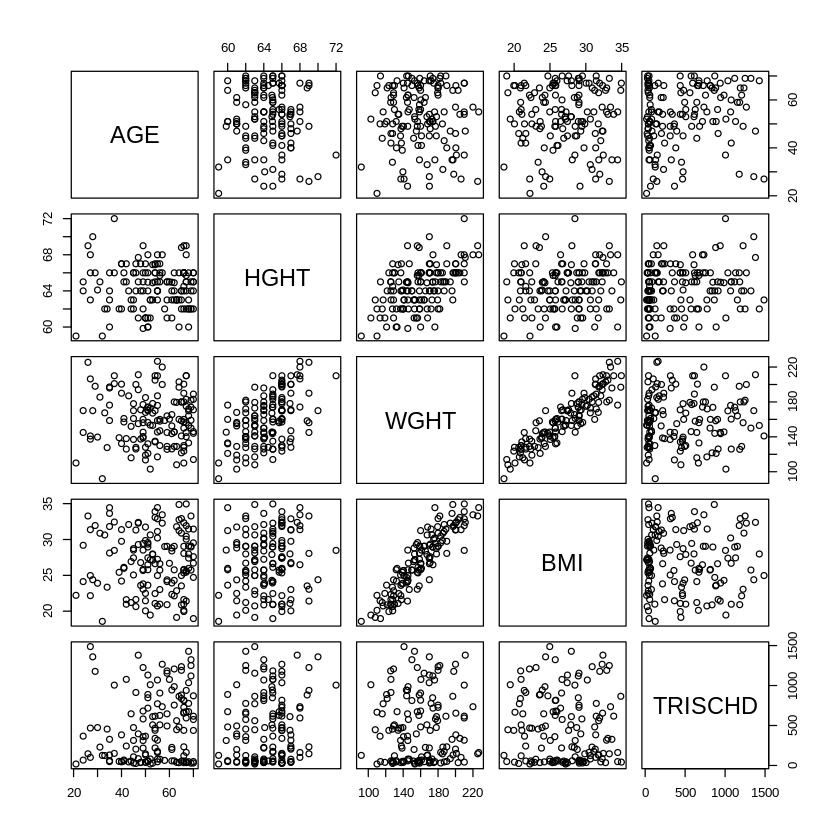

In [ ]:
pairs(numerical_data)

In [ ]:
corrplot(correlation, order = 'AOE', addCoef.col = 'black', tl.pos = 'd',
         cl.pos = 'n', col = COL2('PI'))

ERROR: ignored

In [ ]:
corrplot(correlation, addCoef.col = 'black', col = COL2('RdBu'))


ERROR: ignored

## RNA read counts

In [ ]:
rna_counts = read.delim(file='RNA-read-counts.tsv',sep ='\t',header=TRUE,row.names=1)
head(rna_counts)

,Description,GTEX.1122O.0226,GTEX.1128S.0126,GTEX.113JC.0126,GTEX.11DXX.0226,GTEX.11EM3.0126,GTEX.11EMC.0226,GTEX.11GSP.0126,GTEX.11I78.0526,GTEX.11P81.0126,⋯,GTEX.1PBJI.0726,GTEX.1QCLZ.0626,GTEX.1QEPI.0726,GTEX.1QP28.0626,GTEX.1QP67.0326,GTEX.1QPFJ.0626,GTEX.1R46S.0426,GTEX.1R9JW.0226,GTEX.1RDX4.0926,GTEX.1S5ZU.0726
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,DDX11L1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,1
ENSG00000227232.5,WASH7P,132,259,87,207,122,251,99,125,119,⋯,202,173,164,85,288,183,136,74,168,169
ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,MIR1302-2HG,0,1,1,0,3,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
ENSG00000237613.2,FAM138A,0,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
ENSG00000268020.3,OR4G4P,0,0,0,1,1,0,1,1,0,⋯,0,2,1,0,1,0,0,1,0,1


## Morphological counts

In [ ]:
morph_counts = read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1)
head(morph_counts)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX-1122O-0226,171,133,105,235,13,399,350,681,484,105,⋯,146,264,50,44,30,98,1069,686,513,84
GTEX-1128S-0126,198,60,131,345,261,332,186,285,176,135,⋯,7,416,65,378,63,12,655,199,207,334
GTEX-113JC-0126,175,95,73,160,48,163,93,398,301,56,⋯,65,224,153,29,5,3,438,232,115,34
GTEX-11DXX-0226,79,52,144,20,30,177,177,18,462,213,⋯,93,270,72,69,63,3,131,285,67,43
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,140,⋯,99,41,150,18,2,2,193,44,66,24
GTEX-11EMC-0226,24,35,161,50,233,84,29,42,76,65,⋯,26,77,114,218,2,0,110,19,10,70


In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘Rcpp’, ‘RcppArmadillo’


Old packages: 'bit', 'bslib', 'cachem', 'devtools', 'digest', 'dplyr',
  'evaluate', 'fontawesome', 'fs', 'gargle', 'gert', 'highr', 'isoband',
  'jsonlite', 'pkgload', 'processx', 'ps', 'rlang', 'roxygen2', 'sass',
  

In [ ]:
library("DESeq2")
library(ggplot2)



In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)


corrplot 0.92 loaded



 Q2: clinical data vs. morphology
1) Compute systematically associations between clinical variables and morphological cluster counts. The purpose is to compare the magnitude of the associations of the different variables with morphology.
2) Discuss the association with technical variables.
3) For non-technical variables, redo the analysis with adjustment for the confounding technical variables, if any is reported in Q2.2. Report and discuss significant associations.

In [ ]:
#load data
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)

In [ ]:
#DTHHRDY is a categorical variable, set its type to character to that it can be viewed as such by deseq2
clinical_data$DTHHRDY <- as.character(clinical_data$DTHHRDY)

In [ ]:
morph_counts = t(read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1))

In [ ]:
#Take out "Morphological.cluster" from column names for brevity's sake
row.names(morph_counts) = gsub("Mophological.cluster.", "", row.names(morph_counts))

Automatically generates interesting plots in function of var. All plots are saved under morph_plots/ and file names end in the variable name. In case of a categorical variable, there are some extra plots that can begenerated lile plotCounts and volcano plot. These are not interesting. for the other variables because they are typically made in a "cancer/no cancer" type situation, this can be an interesting style of analysis for e.g. postmortem/donor, but not for weight or height.

In [ ]:
morph_analysis <- function(var, formula, categorical) {
  
  #construct DESEQDataset object
  #we don't normalize the counts since the tutorial from bioconductor
  #says deseq2 does not expect that: 
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#why-un-normalized-counts
  
  #dds holds the read counts. The design formula expresses the variables
  #which will be used in modeling, it is used to estimate the dispersion
  #and to estimate the log2 fold changes of the model
  
  #We will not be pre-filtering low count clusters since we are only working
  #with 64 clusters instead of hundreds or thousands of genes
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pre-filtering
  dds = DESeqDataSetFromMatrix(countData = morph_counts, 
                               colData = clinical_data,
                               design = formula)
  #Run DESeq function
  dds = DESeq(dds)
  res = results(dds)
  #summary of the differential morphology expression
  summary(res)
  
  #Plotting adjusted p-values for each morphological cluster
  #We will go with the default cutoff value 0.1 for padj
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#p-values-and-adjusted-p-values
  #The more dots below the line, the more clusters are significantly linked
  #to the chosen clinical/technical variable(s)
  plot(rownames(morph_counts),xlab = "mean of normalized counts", ylab = "log fold change", cex.lab = 1.5 res$padj)
  abline(h=0.1, col="red")
  
  #Normalized counts of cluster
  #Shows the log2 fold changes attributable to a given variable over the mean
  #of normalized counts for all the samples in the data set
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#ma-plot
  plotMA(res)
  #TODO: bigger dots
  
  #sort results by p-value
  res <- na.omit(res[order(res$padj),])
  
  #Save list of most significant clusters
  #cutoff: padj has to be smaller than 0.1
  sign_clusters = res[res$padj < 0.1,]
  print(sign_clusters)
  
  #Plot the counts of the clusters with the 10 lowest adjusted p-values, one plot per cluster
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#plot-counts
  if (categorical) {
    clusters = rownames(head(res,10))
    for (cluster in clusters) {
      plotCounts(dds, gene=cluster, intgroup=var, main=paste("Cluster ",cluster,sep=""))
    }
  }
  
  #Volcano plot
  #Blue = padj < 0.1
  #Red = padj < 0.1 and fold change > 2
  #https://en.wikipedia.org/wiki/Volcano_plot_(statistics)
  par(mfrow=c(1,1))
  with(res, plot(log2FoldChange, -log10(pvalue), pch=19, main=paste("Volcano plot ", var,sep=""), xlim=c(-3,3)))
  with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=19, col="blue"))
  with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=19, col="red"))
  legend(x="topright", 
         legend=c("Padj > 0.1", "Padj < 0.1", "Padh < 0.1 and log2FC > 2"),
         col=c("black", "blue", "red"),
         pch=19)
 
  
  #PCA
  #TODO???
}

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting 


out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 16, 25%
LFC < 0 (down)     : 17, 27%
outliers [1]       : 2, 3.1%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



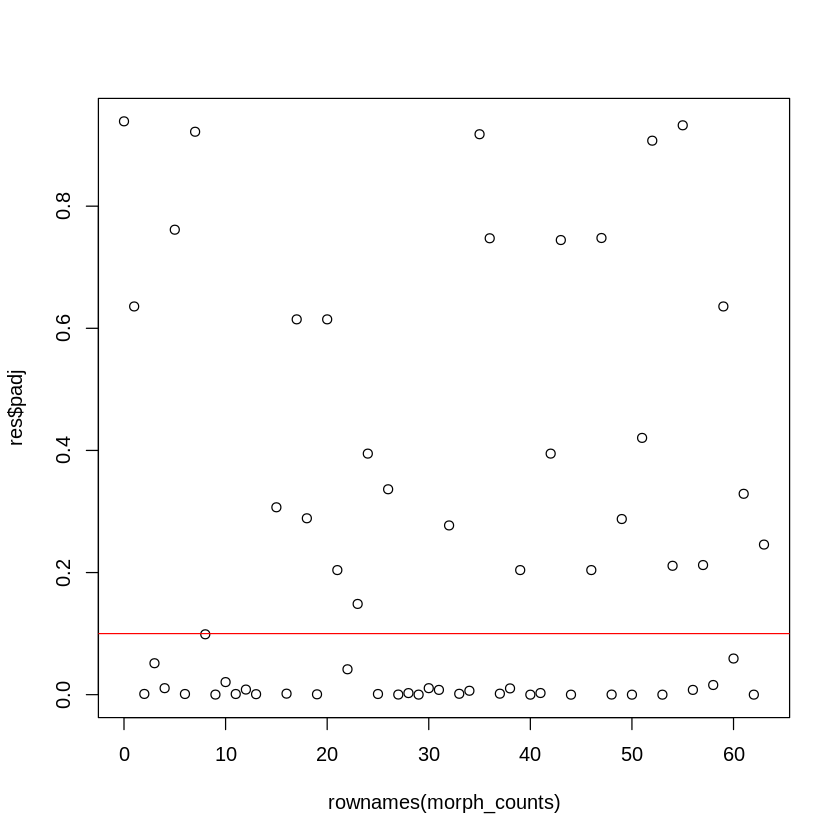

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 33 rows and 6 columns
     baseMean log2FoldChange      lfcSE      stat      pvalue        padj
    <numeric>      <numeric>  <numeric> <numeric>   <numeric>   <numeric>
44   172.3732      0.0397693 0.00719482   5.52749 3.24849e-08 2.01407e-06
40   182.7025      0.0605038 0.01141546   5.30016 1.15701e-07 3.58673e-06
50   188.2888      0.0570618 0.01102518   5.17559 2.27195e-07 4.69537e-06
53    92.9895     -0.0401842 0.00809008  -4.96709 6.79646e-07 1.05345e-05
62   104.8641     -0.0489837 0.01059072  -4.62515 3.74319e-06 4.64155e-05
...       ...            ...        ...       ...         ...         ...
10    93.3999     -0.0257011 0.00992884  -2.58853  0.00963868   0.0206068
22    31.5082     -0.0307420 0.01322763  -2.32407  0.02012158   0.0415846
3    110.1487     -0.0201276 0.00902577  -2.23001  0.02574649   0.0514930
60   156.7795      0.0182298 0.00842876   2.16280  0.03055621   0.0592027
8    121.9710      0.0

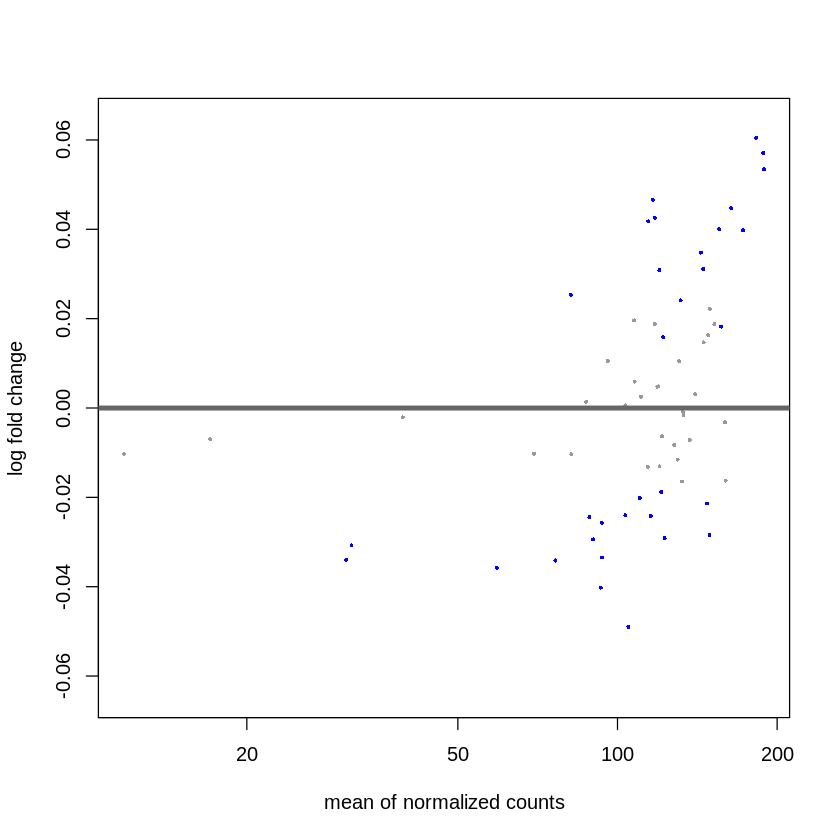

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 21, 33%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



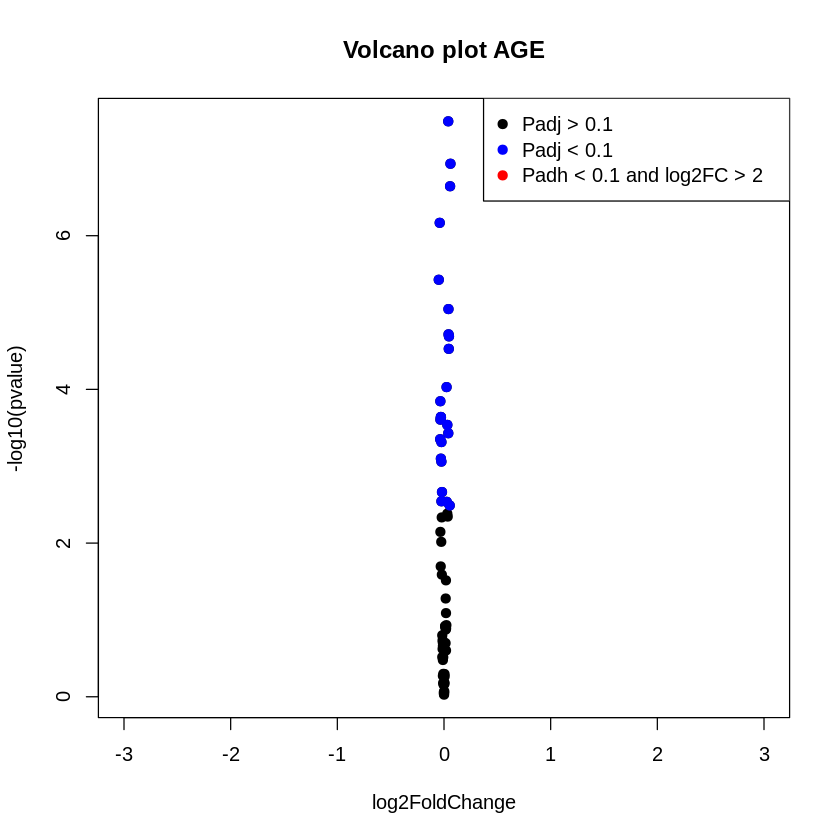

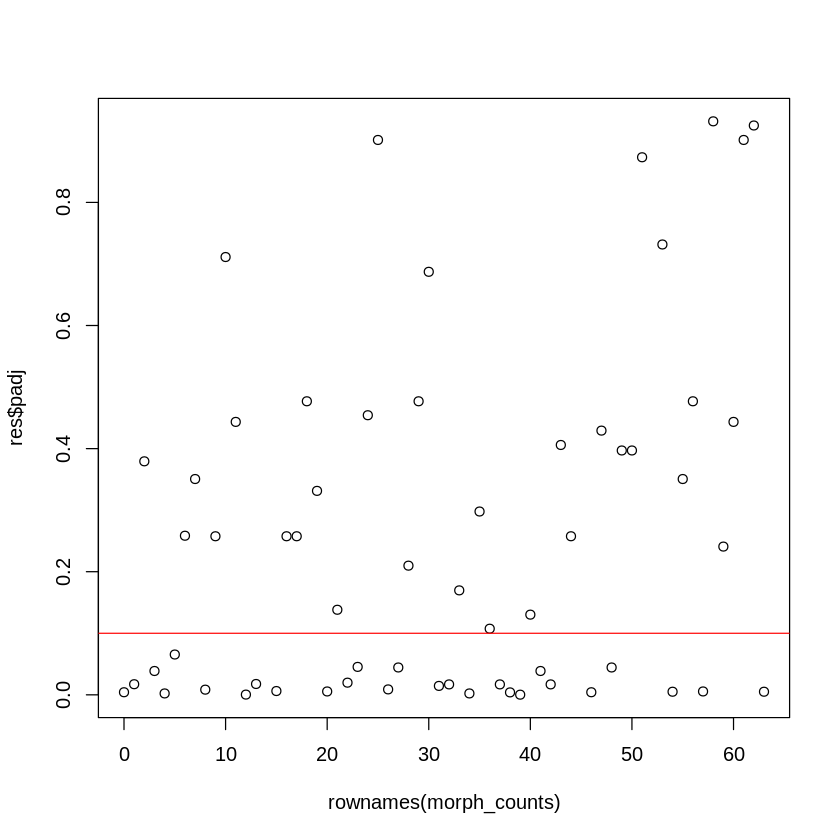

log2 fold change (MLE): HGHT 
Wald test p-value: HGHT 
DataFrame with 27 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
39    149.278       0.328318 0.0712164   4.61015 4.02375e-06 0.000245449
12    188.915       0.406247 0.0928341   4.37606 1.20845e-05 0.000368577
4     143.581       0.240275 0.0631372   3.80560 1.41460e-04 0.002239627
34    121.015      -0.120143 0.0316472  -3.79632 1.46861e-04 0.002239627
38    119.988       0.201035 0.0559135   3.59546 3.23814e-04 0.003950533
...       ...            ...       ...       ...         ...         ...
41    88.5211      0.0959193 0.0392241   2.44542   0.0144684   0.0387172
27   163.8442     -0.1356962 0.0572904  -2.36857   0.0178572   0.0444201
48   116.5553      0.1382275 0.0585357   2.36142   0.0182050   0.0444201
23   152.3163     -0.1312906 0.0561324  -2.33894   0.0193384   0.0453708
5    159.5815     -0.0940403 0.0

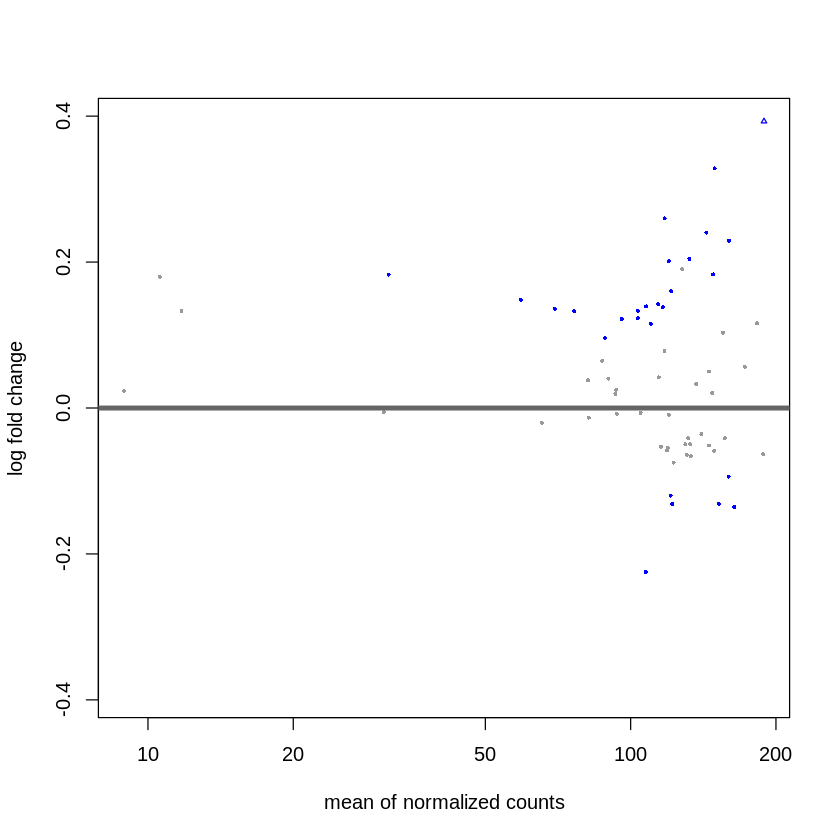

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



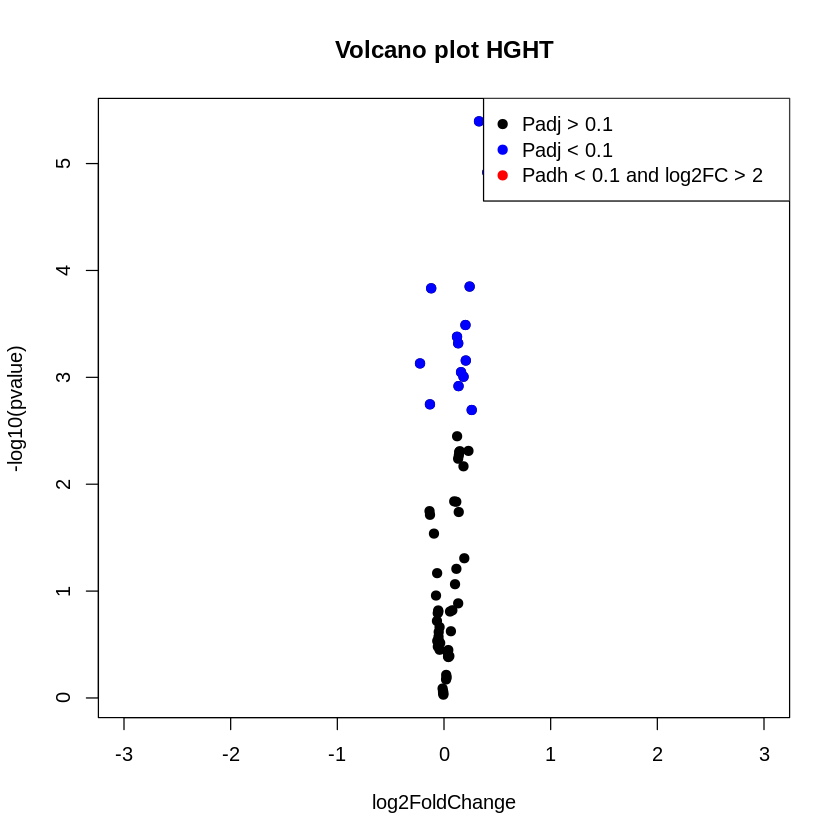

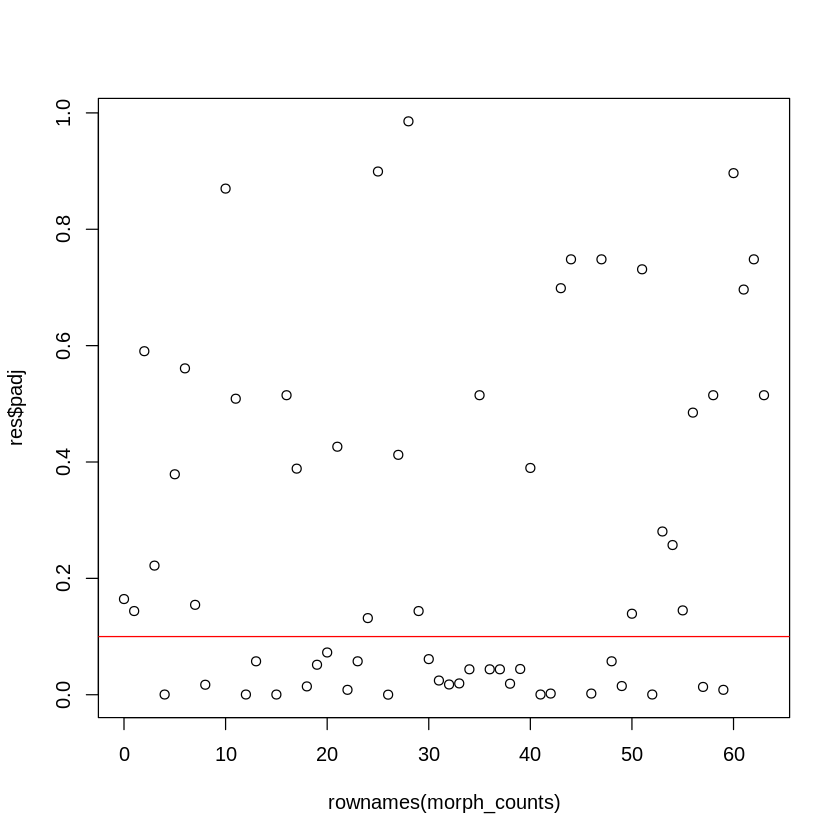

log2 fold change (MLE): WGHT 
Wald test p-value: WGHT 
DataFrame with 28 rows and 6 columns
     baseMean log2FoldChange      lfcSE      stat      pvalue        padj
    <numeric>      <numeric>  <numeric> <numeric>   <numeric>   <numeric>
26   117.5627      0.0328315 0.00689416   4.76222 1.91479e-06 0.000116802
15    69.6019      0.0151750 0.00345643   4.39038 1.13155e-05 0.000345121
4    143.5815      0.0222495 0.00523995   4.24613 2.17498e-05 0.000375165
12   188.9150      0.0329500 0.00786421   4.18987 2.79118e-05 0.000375165
52   110.6787     -0.0232640 0.00558179  -4.16783 3.07512e-05 0.000375165
...       ...            ...        ...       ...         ...         ...
13    76.3889     0.00918936 0.00403013   2.28016   0.0225980   0.0574365
23   152.3163    -0.01060767 0.00469755  -2.25813   0.0239377   0.0574740
48   116.5553     0.01102434 0.00490136   2.24924   0.0244971   0.0574740
30   147.6561     0.00739387 0.00334548   2.21011   0.0270978   0.0612209
20   121.3658     0.

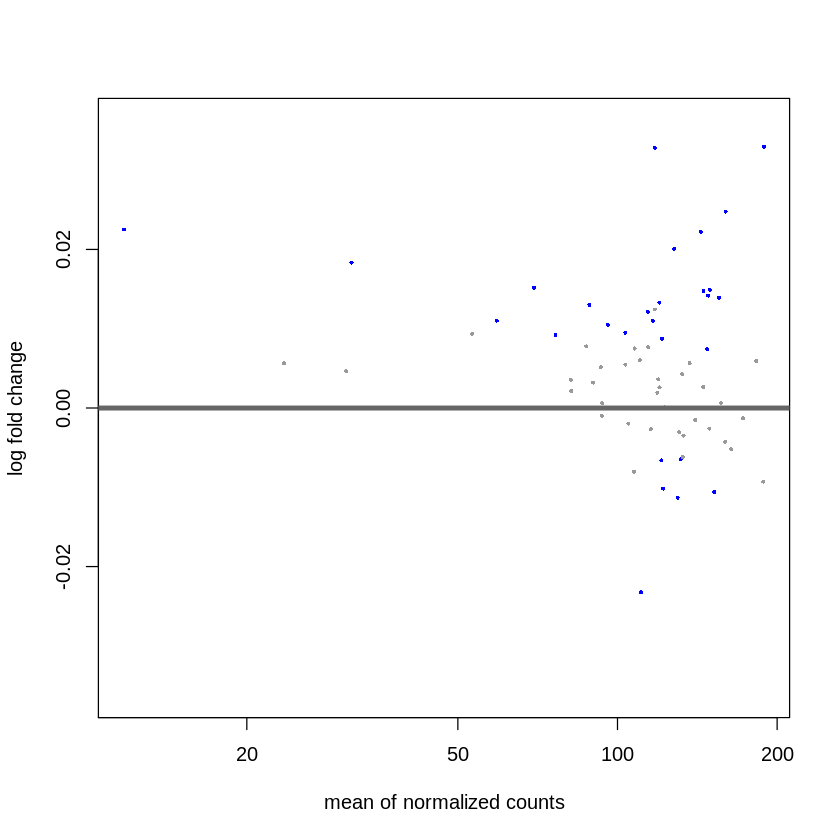

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 9, 14%
LFC < 0 (down)     : 2, 3.1%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



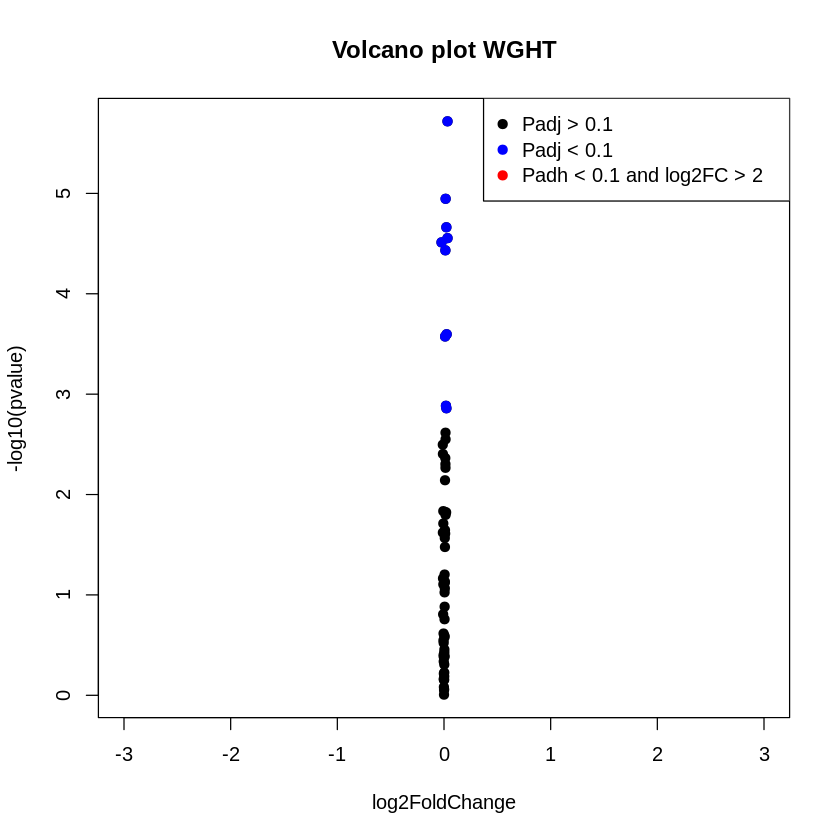

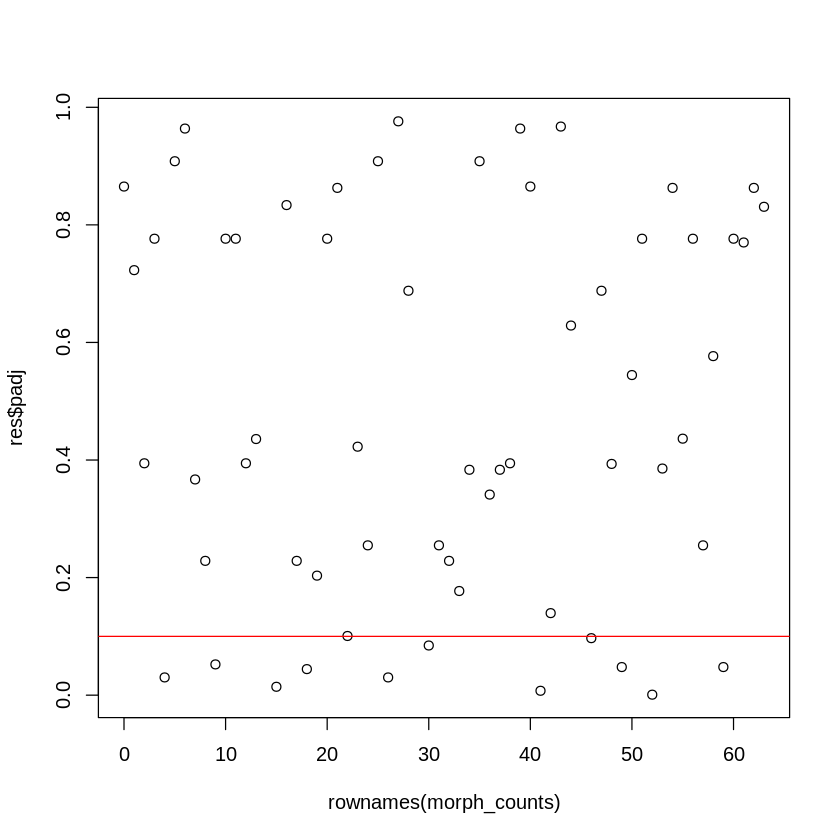

log2 fold change (MLE): BMI 
Wald test p-value: BMI 
DataFrame with 11 rows and 6 columns
    baseMean log2FoldChange     lfcSE      stat      pvalue        padj
   <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
52  110.6787     -0.1673596 0.0385012  -4.34687 1.38094e-05 0.000842374
41   88.5211      0.0810352 0.0220930   3.66791 2.44544e-04 0.007458596
15   69.6019      0.0829513 0.0244761   3.38908 7.01274e-04 0.014259233
4   143.5815      0.1126313 0.0368903   3.05314 2.26459e-03 0.030170785
26  117.5627      0.1467005 0.0484700   3.02662 2.47302e-03 0.030170785
18  145.3042      0.0970766 0.0340512   2.85090 4.35951e-03 0.044321691
49  129.8455     -0.0723951 0.0264861  -2.73333 6.26977e-03 0.047806991
59   11.7334      0.1347199 0.0489635   2.75143 5.93350e-03 0.047806991
9   117.5544      0.0827994 0.0310794   2.66412 7.71898e-03 0.052317535
30  147.6561      0.0567178 0.0230453   2.46115 1.38494e-02 0.084481396
46   95.8441      0.0483531 0.0203478   2.3763

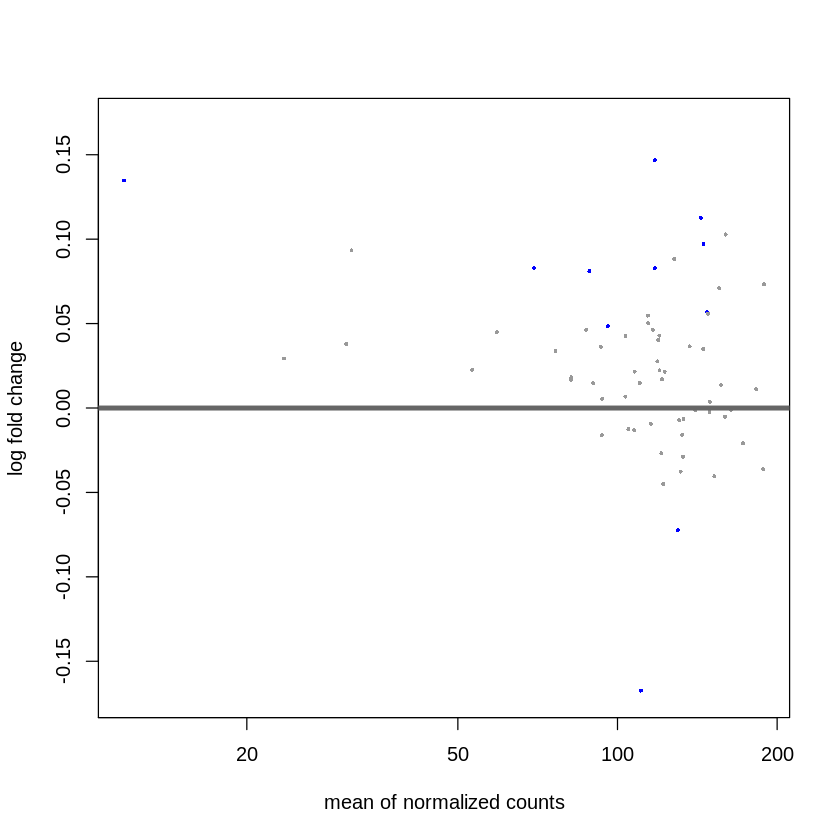

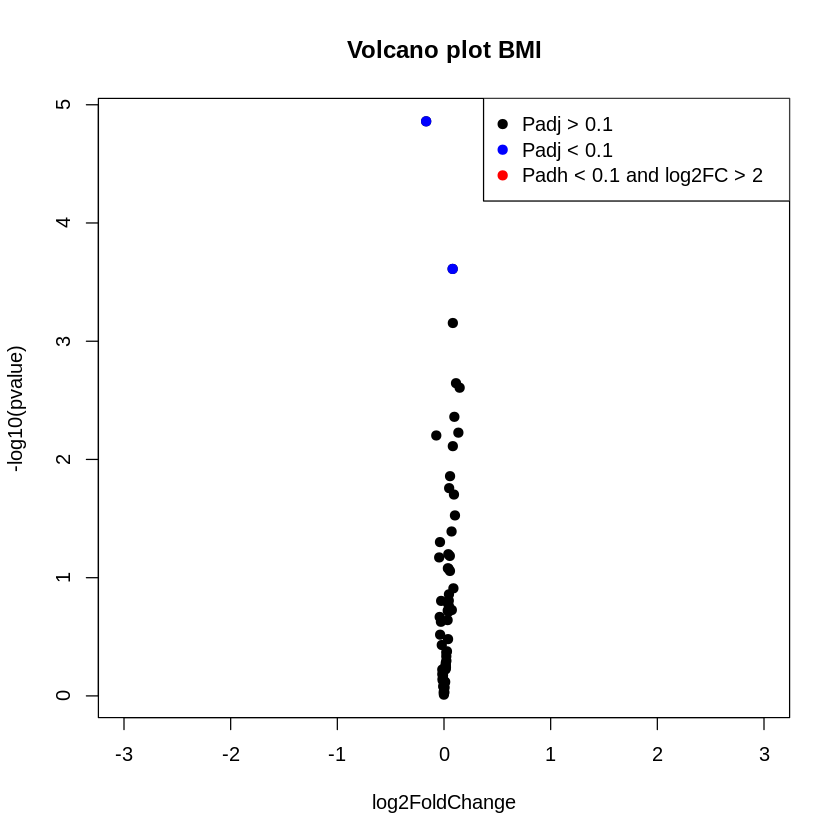

In [ ]:
#Q2.1: clinical variables
morph_analysis("AGE", ~ AGE, FALSE)
morph_analysis("HGHT", ~ HGHT, FALSE)
morph_analysis("WGHT", ~ WGHT, FALSE)
morph_analysis("BMI", ~BMI, FALSE)